In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing and cleaning dataset

In [3]:
gamedf=pd.read_csv("Untitled spreadsheet - vgsales.csv")
gamedf.convert_dtypes().dtypes

Rank              Int64
Name             string
Platform         string
Year              Int64
Genre            string
Publisher        string
NA_Sales        Float64
EU_Sales        Float64
JP_Sales        Float64
Other_Sales     Float64
Global_Sales    Float64
Unnamed: 11       Int64
dtype: object

In [4]:
gamedf=gamedf.dropna()
gamedf=gamedf.drop('Year',axis=1)
gamedf=gamedf.drop('NA_Sales',axis=1)
gamedf=gamedf.drop('EU_Sales',axis=1)
gamedf=gamedf.drop('JP_Sales',axis=1)
gamedf=gamedf.drop('Other_Sales',axis=1)
# x=gamedf.drop('Name',axis=1)
# y=gamedf['Genre_Multiple'].values
# x.head

In [5]:
# #dividing into training and testing
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=10) 
# # print("X_train: ", X_train)
# # print("Y_train : ", Y_train)
# # print("X_test : ", X_test)
# # print("Y_test : ", Y_test)

In [6]:
# knn = KNeighborsClassifier(n_neighbors = 5)
# knn.fit(X_train,Y_train)
# knn.predict(X_test)[0:5]
# knn.score(X_test, Y_test)

In [7]:
gamedf.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          0                                        Wii Sports      Wii   
1          1                                 Super Mario Bros.      NES   
2          2                                    Mario Kart Wii      Wii   
3          3                                 Wii Sports Resort      Wii   
4          4                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16595                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16596                     Men in Black II: Alien Escape       GC   
16595  16597  SCORE International Baja 1000: The Official Game      PS2   
16596  16598                                        Know How 2       DS   
16597  16599                                  Spirits & Spells      GBA   

              Genre   Publisher  Global_Sales  Unnamed: 11  
0       

In [8]:
#Visualization
x=gamedf['Genre']
y=gamedf['Global_Sales']

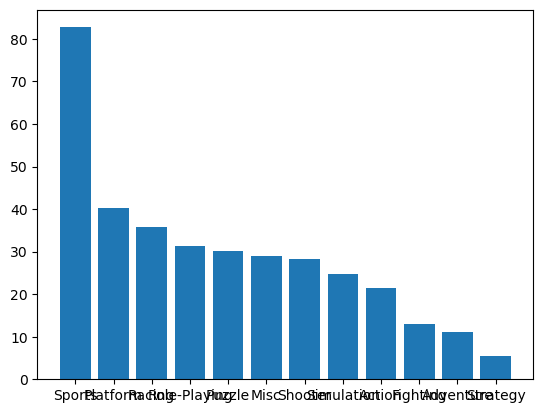

In [27]:
from matplotlib import pyplot as plt
plt.bar(x,y)
plt.show()

<AxesSubplot:>

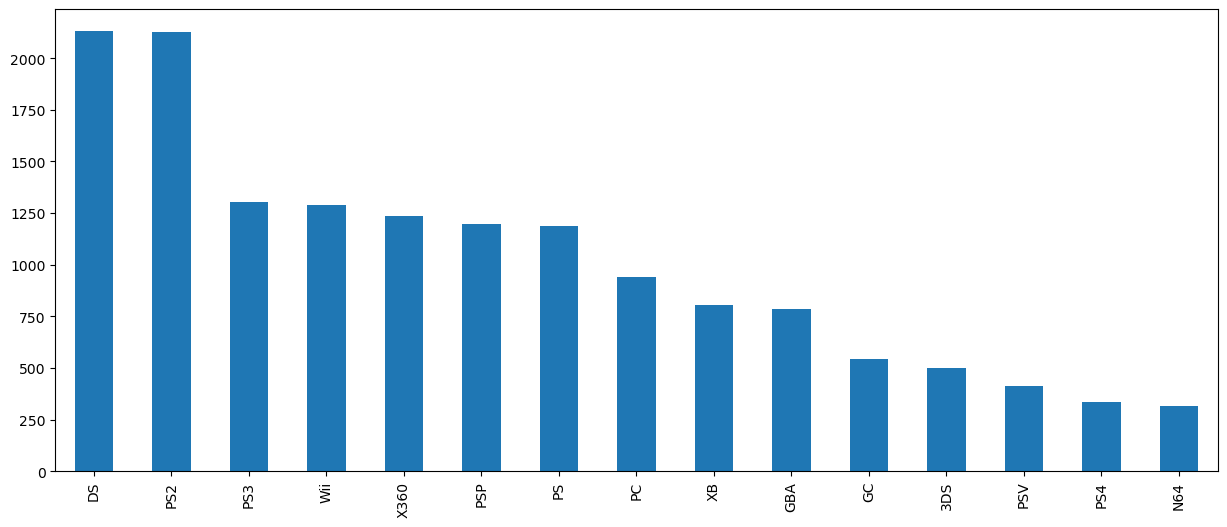

In [9]:
# gamedf['Genre'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))
# gamedf['Publisher'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))
gamedf['Platform'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))

<AxesSubplot:>

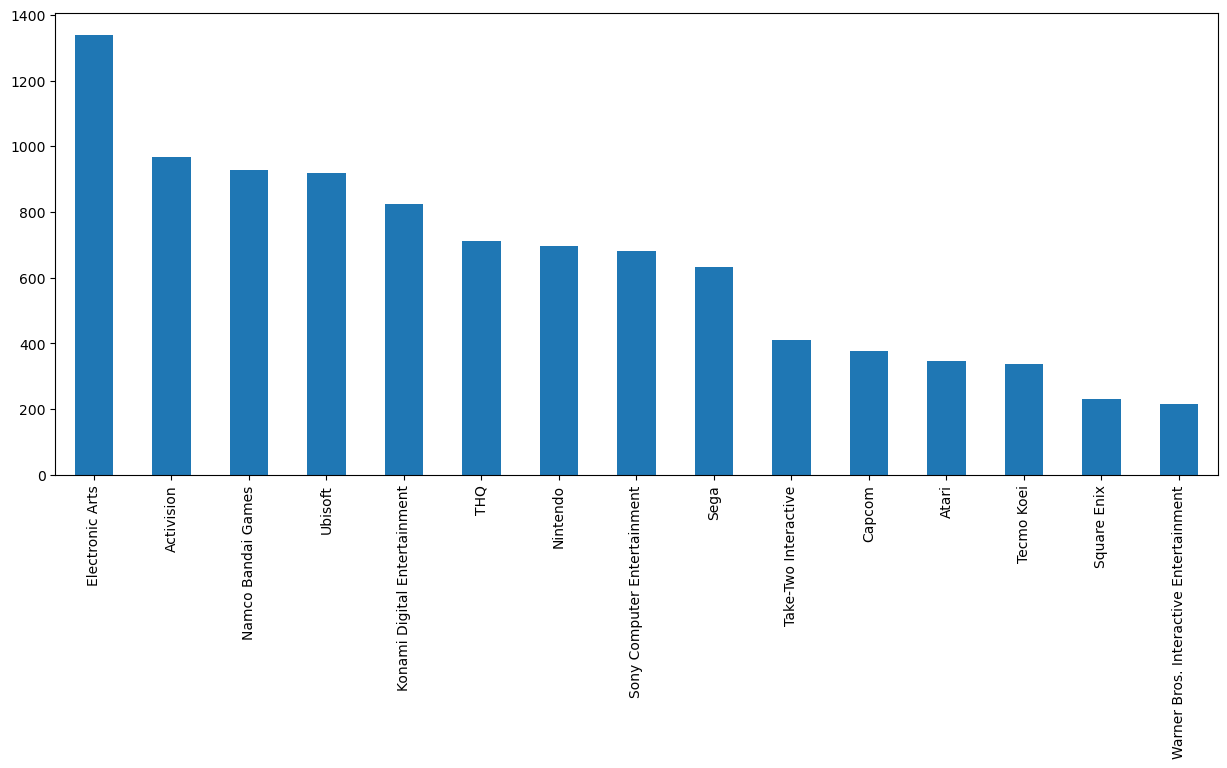

In [10]:
gamedf['Publisher'].value_counts().head(15).plot(kind = 'bar',figsize =(15,6))

<AxesSubplot:ylabel='Genre'>

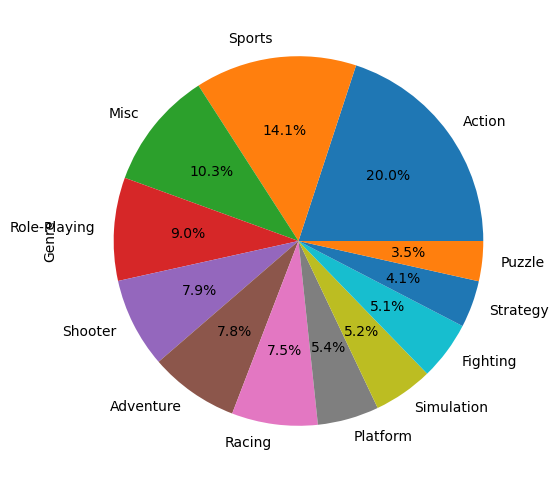

In [11]:
gamedf['Genre'].value_counts().head(15).plot(kind = 'pie',figsize =(15,6), autopct = '%1.1f%%')
# gamedf['Publisher'].value_counts().head(15).plot(kind = 'pie',figsize =(15,6), autopct = '%1.1f%%')
# gamedf['Platform'].value_counts().head(15).plot(kind = 'pie',figsize =(15,6), autopct = '%1.1f%%')

# gamedf.plot.bar(x='Genre', y='Global_Sales',rot=0)
# gamedf.plot.bar(x='Publisher', y='Global_Sales',rot=0)
# gamedf.plot.bar(x='Platform', y='Global_Sales',rot=0)

In [12]:
#lists of columns
genreList = gamedf['Genre'].unique().tolist()
publisherList =gamedf['Publisher'].unique().tolist()
platformList=gamedf['Platform'].unique().tolist()

In [13]:
#for multiple genres
def binarygen(genre_list):
    binaryList = []

    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [14]:
def binarypub(publisher_list):
    binaryList = []

    for pub in publisherList:
        if pub in publisher_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [15]:
def binaryplat(plat_list):
    binaryList=[]

    for plat in platformList:
        if plat in plat_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList


In [16]:
gamedf['Genre_multiple'] = gamedf['Genre'].apply(lambda x: binarygen(x))
gamedf['Plat_multiple'] = gamedf['Platform'].apply(lambda x: binaryplat(x))
gamedf['Publisher_multiple'] = gamedf['Publisher'].apply(lambda x: binarypub(x))
gamedf.head()

,Rank,Name,Platform,Genre,Publisher,Global_Sales,Unnamed: 11,Genre_multiple,Plat_multiple,Publisher_multiple
0,0,Wii Sports,Wii,Sports,Nintendo,82.74,-1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Super Mario Bros.,NES,Platform,Nintendo,40.24,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Mario Kart Wii,Wii,Racing,Nintendo,35.82,1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Wii Sports Resort,Wii,Sports,Nintendo,33.00,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.37,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [17]:
#sciPy Spatial library helps in implementing K nearest neighbor point, and utilities for distance computation
#Using Cosine Similarity for finding the similarity between 2 games.
from scipy import spatial
def Similarity(n1, n2):
    a = gamedf.iloc[n1]
    b = gamedf.iloc[n2]

    genreA = a['Genre_multiple']
    genreB = b['Genre_multiple']

    genreDistance = spatial.distance.cosine(genreA, genreB)

    PlatformA = a['Plat_multiple']
    PlatformB = b['Plat_multiple']

    PlatformDistance = spatial.distance.cosine(PlatformA, PlatformB)

    PublisherA = a['Publisher_multiple']
    PublisherB = b['Publisher_multiple']
    PublisherDistance = spatial.distance.cosine(PublisherA, PublisherB)
    return genreDistance+PlatformDistance+PublisherDistance
print(Similarity(9,85))


3.0


In [28]:
import operator
def getNeighbors(basegame, K):
    distances = []

    for index, game in gamedf.iterrows():
        if game['Rank'] == 16291:
            break
        if game['Rank'] != basegame['Rank'].values[0]:
            dist = Similarity(basegame['Rank'].values[0], game['Rank'])
            distances.append((game['Rank'], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []

    for x in range(K):
        neighbors.append(distances[x])
    return neighbors

In [19]:
def predict_score():
    name = input('Enter a game name :  ')
    new_game = gamedf[gamedf['Name'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Game: ',new_game.Name.values[0])
    K = 5
    neighbors = getNeighbors(new_game, K)
    print('\nRecommended Games: \n')
    for neighbor in neighbors:
        print( gamedf.iloc[neighbor[0]][1] )

    print('\n')
predict_score()

Enter a game name :  Call of Duty: Black Ops
Selected Game:  Call of Duty: Black Ops

Recommended Games: 

Call of Duty: Modern Warfare 3
Call of Duty: Black Ops II
Call of Duty: Modern Warfare 2
Call of Duty: Ghosts
Call of Duty 4: Modern Warfare


